In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# ZIP file path
zip_path = 'credit_card_transactions-ibm_v2.zip'

# CSV inside ZIP has the same name but .csv
csv_inside_zip = 'credit_card_transactions-ibm_v2.zip'

# Read CSV from ZIP
transactions_df = pd.read_csv(zip_path, compression='zip')

transactions_df.head(10)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,NaN,No
6,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
7,0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
8,0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
9,0,0,2002,9,5,09:35,$57.10,Swipe Transaction,4055257078481058705,La Verne,CA,91750.0,7538,NaN,No


# Data Cleaning

In [3]:
transactions_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [4]:
transactions_df.shape

(24386900, 15)

In [5]:
transactions_df.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


In [6]:
# Check for null and duplicate values

null = transactions_df.isna().sum()
print(null)

print() 

duplicate = transactions_df.duplicated().sum()
print(duplicate)

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
dtype: int64

66


In [7]:
# Remove duplicate values
transactions_df.drop_duplicates(inplace=True)

In [8]:
transactions_df.duplicated().sum()

np.int64(0)

In [9]:
transactions_df["Errors?"].value_counts()

Errors?
Insufficient Balance                                   242737
Bad PIN                                                 58918
Technical Glitch                                        48157
Bad Card Number                                         13321
Bad CVV                                                 10740
Bad Expiration                                          10716
Bad Zipcode                                              2079
Bad PIN,Insufficient Balance                              581
Insufficient Balance,Technical Glitch                     457
Bad PIN,Technical Glitch                                  128
Bad Card Number,Insufficient Balance                      122
Bad CVV,Insufficient Balance                               89
Bad Expiration,Insufficient Balance                        78
Bad Card Number,Bad CVV                                    60
Bad Card Number,Bad Expiration                             54
Bad Expiration,Bad CVV                                     47


In [10]:
#   Fill NaN values in 'Errors?' column with "No Error"
transactions_df['Errors?'] = transactions_df['Errors?'].fillna("No Error")

In [11]:
transactions_df['Errors?'].isna().sum()

np.int64(0)

In [12]:
# check to see the source of purchase (online/instore)
transactions_df[transactions_df['Merchant State'].isnull()]['Merchant City'].value_counts()


Merchant City
ONLINE    2720821
Name: count, dtype: int64

In [13]:
# Fill NaN values in 'Merchant State' and 'Zip' columns with "ONLINE"
transactions_df['Merchant State'] = transactions_df['Merchant State'].fillna("ONLINE")
transactions_df['Zip'] = transactions_df['Zip'].fillna("ONLINE")

In [14]:
transactions_df.isna().sum()

User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
dtype: int64

In [15]:
transactions_df.describe()

,User,Card,Year,Month,Day,Merchant Name,MCC
count,2.438683e+07,2.438683e+07,2.438683e+07,2.438683e+07,2.438683e+07,2.438683e+07,2.438683e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525062e+00,1.571812e+01,-4.769168e+17,5.561173e+03
std,5.694611e+02,1.407154e+00,5.105920e+00,3.472354e+00,8.794072e+00,4.758943e+18,8.793160e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.402000e+03


In [16]:
# Convert Yes or No into Binary
transactions_df.loc[transactions_df['Is Fraud?'] == 'Yes', 'Is Fraud?'] = 1
transactions_df.loc[transactions_df['Is Fraud?'] == 'No',  'Is Fraud?'] = 0

In [17]:
transactions_df['Errors?'].unique()

array(['No Error', 'Technical Glitch', 'Insufficient Balance', 'Bad PIN',
       'Bad PIN,Insufficient Balance', 'Bad Expiration',
       'Bad PIN,Technical Glitch', 'Bad Card Number', 'Bad CVV',
       'Bad Zipcode', 'Insufficient Balance,Technical Glitch',
       'Bad Card Number,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Insufficient Balance', 'Bad Card Number,Bad Expiration',
       'Bad Expiration,Bad CVV', 'Bad Expiration,Insufficient Balance',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration,Technical Glitch',
       'Bad CVV,Technical Glitch', 'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance', 'Bad Zipcode,Technical Glitch',
       'Bad Card Number,Bad Expiration,Insufficient Balance'],
      dtype=object)

In [22]:
# Clean and Transform 'Amount' column
transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)
transactions_df['Amount'] = pd.to_numeric(transactions_df['Amount'], errors='coerce')

# Drop any remaining NaN values in 'Amount' column
transactions_df = transactions_df.dropna(subset=['Amount'])

In [29]:
# Combine date and time into a datetime column
transactions_df['DateTime'] = pd.to_datetime(
    transactions_df['Year'].astype(str) + '-' +
    transactions_df['Month'].astype(str) + '-' +
    transactions_df['Day'].astype(str) + ' ' +
    transactions_df['Time'],
    errors='coerce'
)

# Drop rows with invalid datetime
transactions_df = transactions_df.dropna(subset=['DateTime'])

# Data Exploration

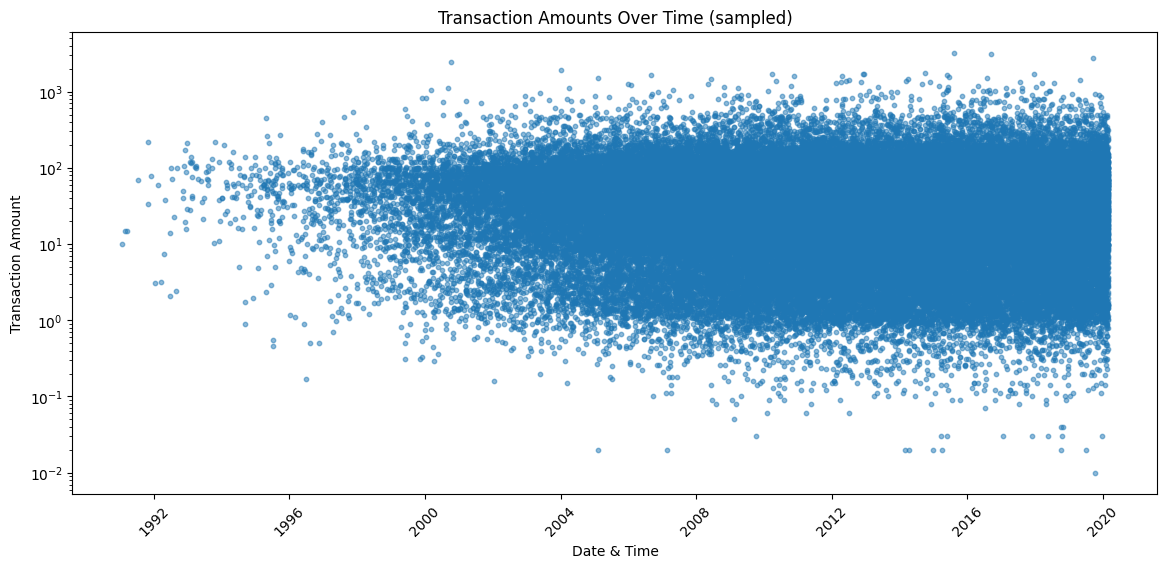

In [33]:
# Check for outliers in 'Amount' column
import matplotlib.pyplot as plt

# Sample 100,000 points
sample_df = transactions_df.sample(100000, random_state=42)

# Scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(sample_df['DateTime'], sample_df['Amount'], alpha=0.5, s=10)
plt.yscale('log')  # optional, makes skewed data easier to see
plt.xlabel('Date & Time')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts Over Time (sampled)')
plt.xticks(rotation=45)
plt.show()
